<a href="https://colab.research.google.com/github/farkhanAdhitama/Dataset/blob/master/Model_Rekomendasi_Artikel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Persiapan Dataset

In [ ]:
# Membaca file CSV
df = pd.read_csv('primary-dataset.csv')

# Mengambil kolom judul artikel
# judul_artikel = df['Title'].tolist()

In [ ]:
# Lihat 5 Data teratas
print(df['text'].head(5))

0    Purnomo Serahkan Surat Mundur dari Pilkada  ke...
1    Pemkot Bekasi Teken Aturan Tempat Hiburan Menu...
2    New Normal 5 Juni, ASN Tak Mesti Berbondong-bo...
3    WHO Waspadai Banyak Kematian di Puncak Kedua P...
4                     VIDEO: Trump Ancam Tutup Twitter
Name: text, dtype: object


# Preprocessing Data

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Preprocessing Data Training

import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)


True

In [ ]:
data_duplikat = df.duplicated().sum()
print(data_duplikat)

2


In [ ]:
# Hapus Data Duplikat
df.drop_duplicates(subset=['text'], inplace=True)
print(data_duplikat)

2


### Case Folding

In [ ]:
# Ubah ke lowercase
df['case_folding'] = df['text'].apply(lambda x: x.lower())

In [ ]:
print(df['case_folding'].head(5))

0    mengenal spinal cord injury: penyebab, gejala,...
1    update covid-19 ri 13 mei: tambah 1.245 kasus ...
2    status darurat dicabut who, kemenkes tetap keb...
3    update covid-19 ri 12 mei: tambah 1.471 kasus ...
4    8 penyebab sakit perut sebelah kanan dan cara ...
Name: case_folding, dtype: object


### Number Removal


In [ ]:
df['num_remover'] = df['case_folding'].apply(lambda x: re.sub(r'\d+', '', x))

In [ ]:
print(df['num_remover'].head(5))

0    purnomo serahkan surat mundur dari pilkada  ke...
1    pemkot bekasi teken aturan tempat hiburan menu...
2    new normal  juni, asn tak mesti berbondong-bon...
3    who waspadai banyak kematian di puncak kedua p...
4                     video: trump ancam tutup twitter
Name: num_remover, dtype: object


### String Punctuation (Hapus Tanda Baca)

In [ ]:
import string
df['string_punc'] = df['num_remover'].apply(lambda x: x.translate(str.maketrans("","",string.punctuation)))

In [ ]:
print(df['string_punc'].head(5))

0    purnomo serahkan surat mundur dari pilkada  ke...
1    pemkot bekasi teken aturan tempat hiburan menu...
2    new normal  juni asn tak mesti berbondongbondo...
3    who waspadai banyak kematian di puncak kedua p...
4                      video trump ancam tutup twitter
Name: string_punc, dtype: object


### Hilangkan Kata "lansia"

In [ ]:
df['lansia_removal'] = df['string_punc'].apply(lambda x: x.replace('lansia', ''))

In [ ]:
print(df['lansia_removal'].head(5))

0    purnomo serahkan surat mundur dari pilkada  ke...
1    pemkot bekasi teken aturan tempat hiburan menu...
2    new normal  juni asn tak mesti berbondongbondo...
3    who waspadai banyak kematian di puncak kedua p...
4                      video trump ancam tutup twitter
Name: lansia_removal, dtype: object


### Whitespace Removing

In [ ]:
df['whitespace_remove'] = df['lansia_removal'].apply(lambda x: x.strip())

In [ ]:
print(df['whitespace_remove'].head(5))

0    purnomo serahkan surat mundur dari pilkada  ke...
1    pemkot bekasi teken aturan tempat hiburan menu...
2    new normal  juni asn tak mesti berbondongbondo...
3    who waspadai banyak kematian di puncak kedua p...
4                      video trump ancam tutup twitter
Name: whitespace_remove, dtype: object


### Stopword Removal

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
stopword_remover = factory.create_stop_word_remover()
df['stopword_removal'] = df['whitespace_remove'].apply(lambda x: stopword_remover.remove(x))

In [ ]:
print(df['stopword_removal'].head(5))

0    purnomo serahkan surat mundur pilkada  dpc pdi...
1    pemkot bekasi teken aturan tempat hiburan menu...
2    new normal  juni asn tak mesti berbondongbondo...
3    who waspadai banyak kematian puncak kedua pand...
4                      video trump ancam tutup twitter
Name: stopword_removal, dtype: object


### Stemming

In [ ]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['stemming'] = df['stopword_removal'].apply(lambda x: stemmer.stem(x))

In [ ]:
print(df['stemming'].head(5))

0     purnomo serah surat mundur pilkada dpc pdip solo
1    pemkot bekas teken atur tempat hibur tuju new ...
2    new normal juni asn tak mesti berbondongbondon...
3    who waspada banyak mati puncak dua pandemi corona
4                      video trump ancam tutup twitter
Name: stemming, dtype: object


In [ ]:
clean_data = df['stemming']

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split


# Langkah 1: Persiapan Dataset
# Mengambil kolom input judul artikel
judul_artikel = clean_data.tolist()


In [ ]:
# Langkah 2: Tokenisasi dan Encoding

# Inisialisasi objek Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(judul_artikel)

# Ubah judul artikel menjadi urutan angka
sequences = tokenizer.texts_to_sequences(judul_artikel)

In [ ]:
print(sequences)

[[1542, 568, 515, 628, 267, 3038, 1543, 800], [801, 107, 1544, 155, 108, 629, 458, 5, 4], [5, 4, 14, 802, 7, 2052, 3039, 227], [183, 325, 125, 85, 708, 228, 8, 3], [24, 164, 326, 109, 412], [1058, 1059, 184, 110, 135, 2053, 413, 1060, 709], [1545, 630, 111, 1061, 1270, 135, 1], [1271, 3, 2054, 9, 631], [327, 2055, 25, 632, 414, 61, 3040], [375, 902, 1062, 803, 34, 1546, 208], [633, 569, 58, 349, 710, 108, 2056], [23, 711, 1063, 12, 6, 2057, 1547, 903, 633], [415, 10, 109, 634, 459, 112, 290, 416], [2058, 460, 209, 1064, 268, 269, 3041, 3042], [210, 1548, 2059, 1065, 804, 229], [211, 3043, 2060, 570, 3044, 3045, 3046], [805, 1066, 141, 712, 713, 34, 1272], [3047, 304, 3048, 100, 3049, 376, 635], [62, 142, 571, 714, 1273, 9], [2061, 230, 18], [92, 11, 516, 377, 1274], [904, 572, 715, 378, 569], [212, 806, 1549, 73, 1067, 1275], [24, 716, 3050, 379, 1276, 67, 68], [380, 113, 381, 43, 2062, 350, 165], [20, 6, 3, 76, 7, 141, 1550, 2063], [231, 172, 636, 1277, 107, 3051, 382, 44, 305], [417,

In [ ]:
# Langkah 3: Padding

# Tentukan panjang maksimum urutan
max_length = max([len(seq) for seq in sequences])
# Padding urutan agar memiliki panjang yang sama
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [ ]:
print(padded_sequences)

[[1542  568  515 ...    0    0    0]
 [ 801  107 1544 ...    0    0    0]
 [   5    4   14 ...    0    0    0]
 ...
 [  17   65   37 ...    0    0    0]
 [6021  256 6022 ...    0    0    0]
 [3026  626  627 ...    0    0    0]]


In [ ]:
#Split data
padded_sequences_train, padded_sequences_test= train_test_split(padded_sequences,random_state = 42, train_size=0.8)

In [ ]:
print(padded_sequences_train.shape)

(2576, 24)


In [ ]:
print(padded_sequences_test.shape)

(644, 24)


In [ ]:
# Langkah 4: Pembuatan Model

# Inisialisasi model TensorFlow Sequential
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(judul_artikel), activation='softmax')
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Langkah 5: Pelatihan Model

# Persiapan data training
labels = list(range(len(judul_artikel)))  # Label adalah indeks judul artikel

# Konversi data menjadi array NumPy
padded_sequences = np.array(padded_sequences)
labels = np.array(labels)

#Split labels
labels_train, labels_test= train_test_split(labels,random_state = 42, train_size=0.8)

# Pelatihan model
# model.fit(padded_sequences, labels, epochs=50)
history = model.fit(padded_sequences_train, 
                    labels_train, epochs=50, batch_size = 64, validation_data = 
                     (padded_sequences_test, labels_test))

Epoch 1/50
41/41 [==============================] - 2s 22ms/step - loss: 8.0839 - accuracy: 0.0000e+00 - val_loss: 8.0961 - val_accuracy: 0.0000e+00
Epoch 2/50
41/41 [==============================] - 1s 20ms/step - loss: 8.0707 - accuracy: 0.0000e+00 - val_loss: 8.1306 - val_accuracy: 0.0000e+00
Epoch 3/50
41/41 [==============================] - 1s 19ms/step - loss: 8.0625 - accuracy: 0.0000e+00 - val_loss: 8.1817 - val_accuracy: 0.0000e+00
Epoch 4/50
41/41 [==============================] - 1s 20ms/step - loss: 8.0456 - accuracy: 3.8820e-04 - val_loss: 8.4318 - val_accuracy: 0.0000e+00
Epoch 5/50
41/41 [==============================] - 1s 20ms/step - loss: 7.9972 - accuracy: 3.8820e-04 - val_loss: 9.1840 - val_accuracy: 0.0000e+00
Epoch 6/50
41/41 [==============================] - 1s 19ms/step - loss: 7.9319 - accuracy: 0.0000e+00 - val_loss: 9.9290 - val_accuracy: 0.0000e+00
Epoch 7/50
41/41 [==============================] - 1s 19ms/step - loss: 7.8957 - accuracy: 3.8820e-04 - v

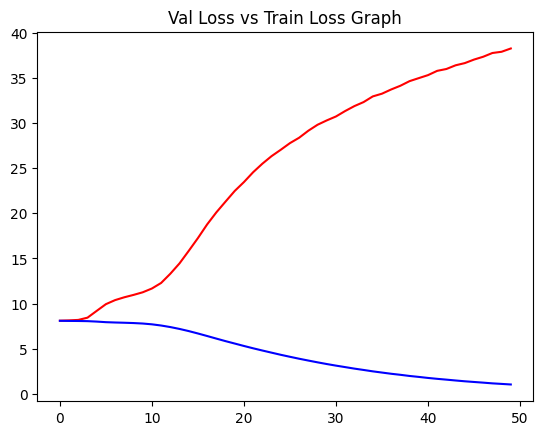

In [ ]:
# summarize history for loss
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'], color='r', label='Val Loss')
plt.plot(history.history['loss'], color='b', label='Train Loss')
plt.title('Val Loss vs Train Loss Graph')
plt.show()

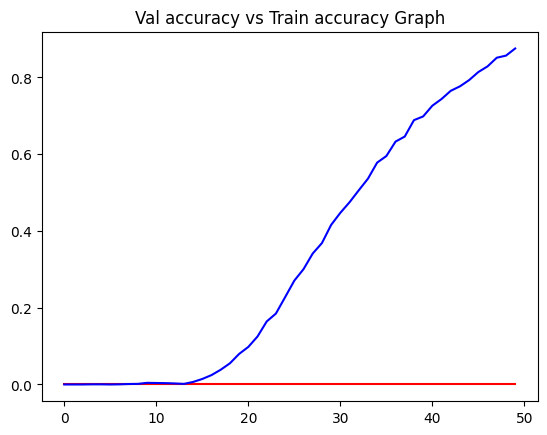

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'], color='r', label='Val accuracy')
plt.plot(history.history['accuracy'], color='b', label='Train accuracy')
plt.title('Val accuracy vs Train accuracy Graph')
plt.show()

In [ ]:
# Langkah 6: Prediksi dan Rekomendasi

# Judul artikel input 
judul_input = ["prokontra vaksin covid"]

# Ubah judul input menjadi urutan angka
input_sequence = tokenizer.texts_to_sequences(judul_input)
input_padded = pad_sequences(input_sequence, maxlen=max_length, padding='post')

# Dapatkan representasi vektor dari judul input
input_vector = model.predict(input_padded)

# Hitung kesamaan kosinus antara vektor input dan vektor artikel dalam dataset
similarities = []
for article_vector in model.predict(padded_sequences):
    similarity = cosine_similarity(input_vector, article_vector.reshape(1, -1))
    similarities.append(similarity[0][0])

# Urutkan indeks artikel berdasarkan kesamaan kosinus (peringkat paling mirip)
ranked_indices = np.argsort(similarities)[::-1]

# Tampilkan peringkat artikel paling mirip
for index in ranked_indices:
    print(judul_artikel[index])


101/101 [==============================] - 0s 3ms/step
warga sulbar sembuh covid
aplikasi bahaya kandung malware ponsel android
negara aman covid
rekomendasi hidup adaptasi covid
foto tugas gabung gencar periksa sikm jakarta
asyik kejar balon udara orang bocah jemur sumur madiun
tampak bagai wajah ariel permak aplikasi
unhas beri jumlah rekomendasi tangan covid
vaksin berantas sakit
layang pandang sejarah kerak telor jakarta
pandu aman harus bawa rumah sakit
dampak buruk psikologis anak lihat orangtuanya cerai
tempat belanja online banyak
kondisi kini proyek tol serpongcinere
periksa rutin tempat tampung covid
polisi peru tinggal akibat covid
foto juang warga venezuela dapat air minum
indonesia negaranegara batal berangkat jamaah haji
video polemik hapus batas tumpang angkut darat
jenazah serang polisi karanganyar tolak madiun
dagang pasar leuwipanjang reaktif covid
bebas diri segala negatif pisces
foto sikm laku agen bus akap terminal pulogebang landa sepi
teliti pandemi dampak disrup